# **Wine Segmentation Analysis using K-Means algorithm**

**Objective:** using K-Means model to identify the number of possible groups in wine dataset based on provided criteria / features

**Data is taken from:** [link text](https://www.kaggle.com/harrywang/wine-dataset-for-clustering)

**Background:** these data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

**The attributes are:**<br />
Alcohol<br />
Malic acid<br />
Ash<br />
Alcalinity of ash<br />
Magnesium<br />
Total phenols<br />
Flavanoids<br />
Nonflavanoid phenols<br />
Proanthocyanins<br />
Color intensity<br />
Hue<br />
OD280/OD315 of diluted wines<br />
Proline<br />

In [ ]:
# import necessary packages
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (12, 6))
sns.set(rc={'figure.figsize':(11.7,7.27)})
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids 
from sklearn.preprocessing import StandardScaler

<Figure size 864x432 with 0 Axes>

In [ ]:
# loading dataset
path = "/content/drive/MyDrive/Colab Notebooks/data/5 \
- clustering/wine-clustering.csv"
df = pd.read_csv(path)
df

Alcohol  Malic_Acid   Ash  ...   Hue  OD280  Proline
0      14.23        1.71  2.43  ...  1.04   3.92     1065
1      13.20        1.78  2.14  ...  1.05   3.40     1050
2      13.16        2.36  2.67  ...  1.03   3.17     1185
3      14.37        1.95  2.50  ...  0.86   3.45     1480
4      13.24        2.59  2.87  ...  1.04   2.93      735
..       ...         ...   ...  ...   ...    ...      ...
173    13.71        5.65  2.45  ...  0.64   1.74      740
174    13.40        3.91  2.48  ...  0.70   1.56      750
175    13.27        4.28  2.26  ...  0.59   1.56      835
176    13.17        2.59  2.37  ...  0.60   1.62      840
177    14.13        4.10  2.74  ...  0.61   1.60      560

[178 rows x 13 columns]

In [ ]:
# getting info for our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
df.describe()

Alcohol  Malic_Acid         Ash  ...         Hue       OD280      Proline
count  178.000000  178.000000  178.000000  ...  178.000000  178.000000   178.000000
mean    13.000618    2.336348    2.366517  ...    0.957449    2.611685   746.893258
std      0.811827    1.117146    0.274344  ...    0.228572    0.709990   314.907474
min     11.030000    0.740000    1.360000  ...    0.480000    1.270000   278.000000
25%     12.362500    1.602500    2.210000  ...    0.782500    1.937500   500.500000
50%     13.050000    1.865000    2.360000  ...    0.965000    2.780000   673.500000
75%     13.677500    3.082500    2.557500  ...    1.120000    3.170000   985.000000
max     14.830000    5.800000    3.230000  ...    1.710000    4.000000  1680.000000

[8 rows x 13 columns]

In [ ]:
# let's see for the existence of NaNs
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

Look's like no missing values and dtypes in proper (expected) order

In [ ]:
# let's look for duplicates
df.duplicated().sum()

0

### **EDA**

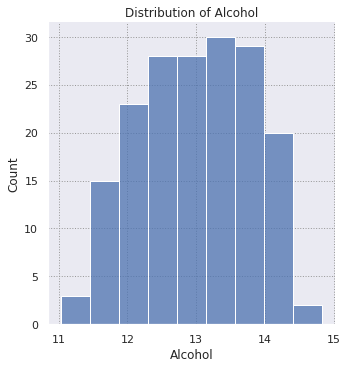

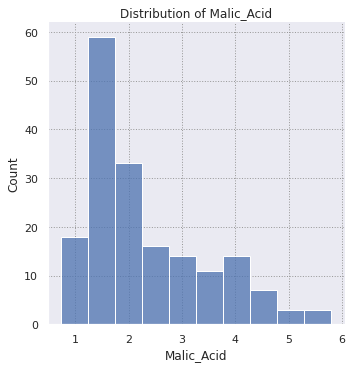

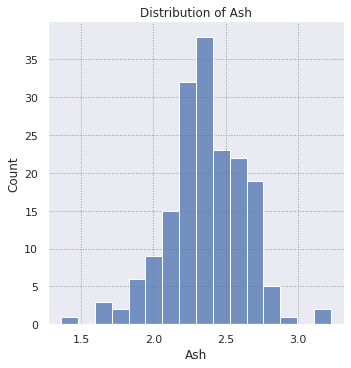

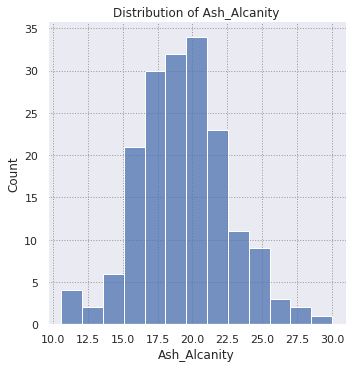

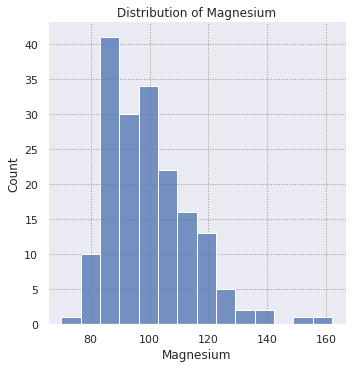

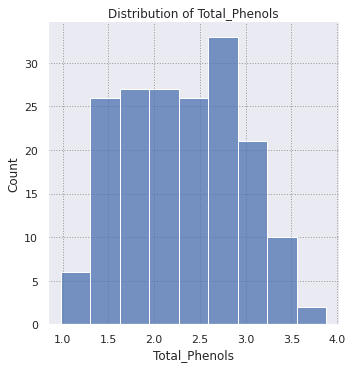

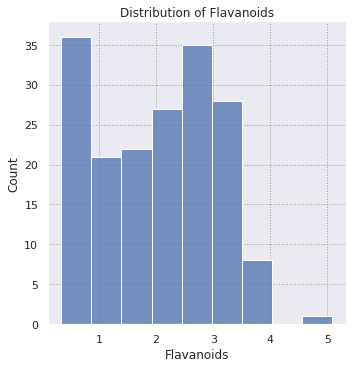

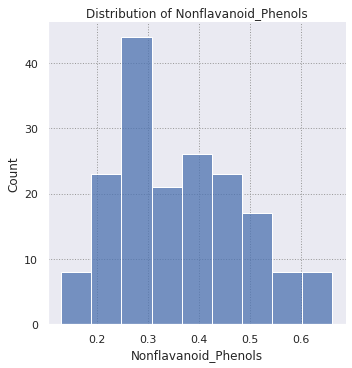

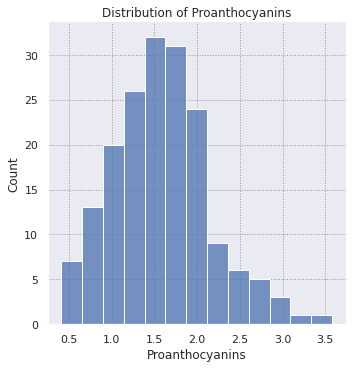

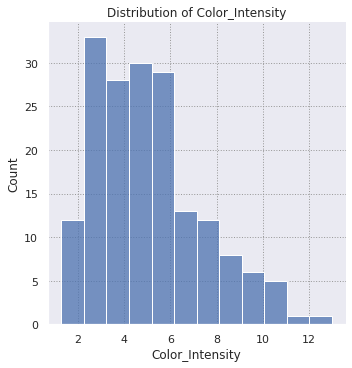

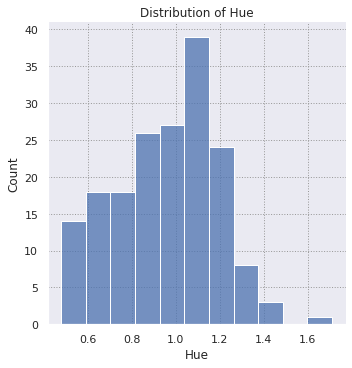

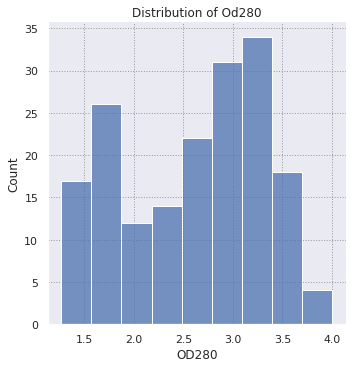

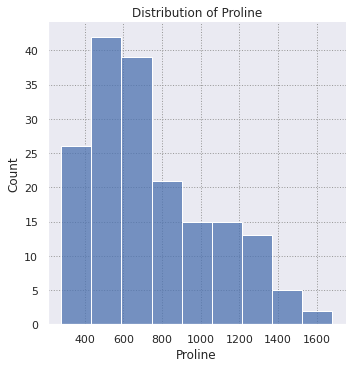

In [ ]:
# let's start exploring with distribution graph
#_ = sns.displot(df['Alcohol'])
for i in df.columns:
  _ = sns.displot(df[i])
  _ = plt.title(f"Distribution of {i.title()}")
  plt.show()

So, from the graphs above we can say that some of the features probably have outliers (like: Magnesium, Flavanoids, Hue) that badly will affect K-Means modeling. But let's explore a little further to confirm our findings. Also, we should mention that our dataset has a normal distribution in overall excluding features: Magnesium, Color_Intensity, and Proline.

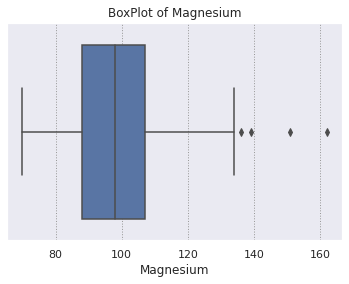

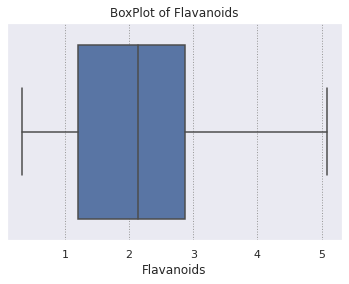

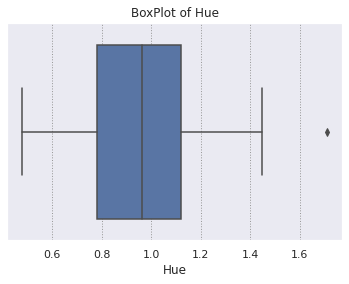

In [ ]:
# let's take a visual look using boxplot to spot outliers
for i in ["Magnesium", "Flavanoids", "Hue"]:
  _ = sns.boxplot(df[i])
  _ = plt.title(f"BoxPlot of {i.title()}")
  plt.show()

So, as we predicted from this previous graph that some features consist of outliers. In this case, we should consider the option of using K-Means and K-Medians just to see the difference in performance because the K-Median model is designed to deal with problems like we have here. Just to remember, if we desire a better performance of the K-Means model we need to deal with outliers before we're fitting to the model. But for this time we will stick with the original version (not removing).

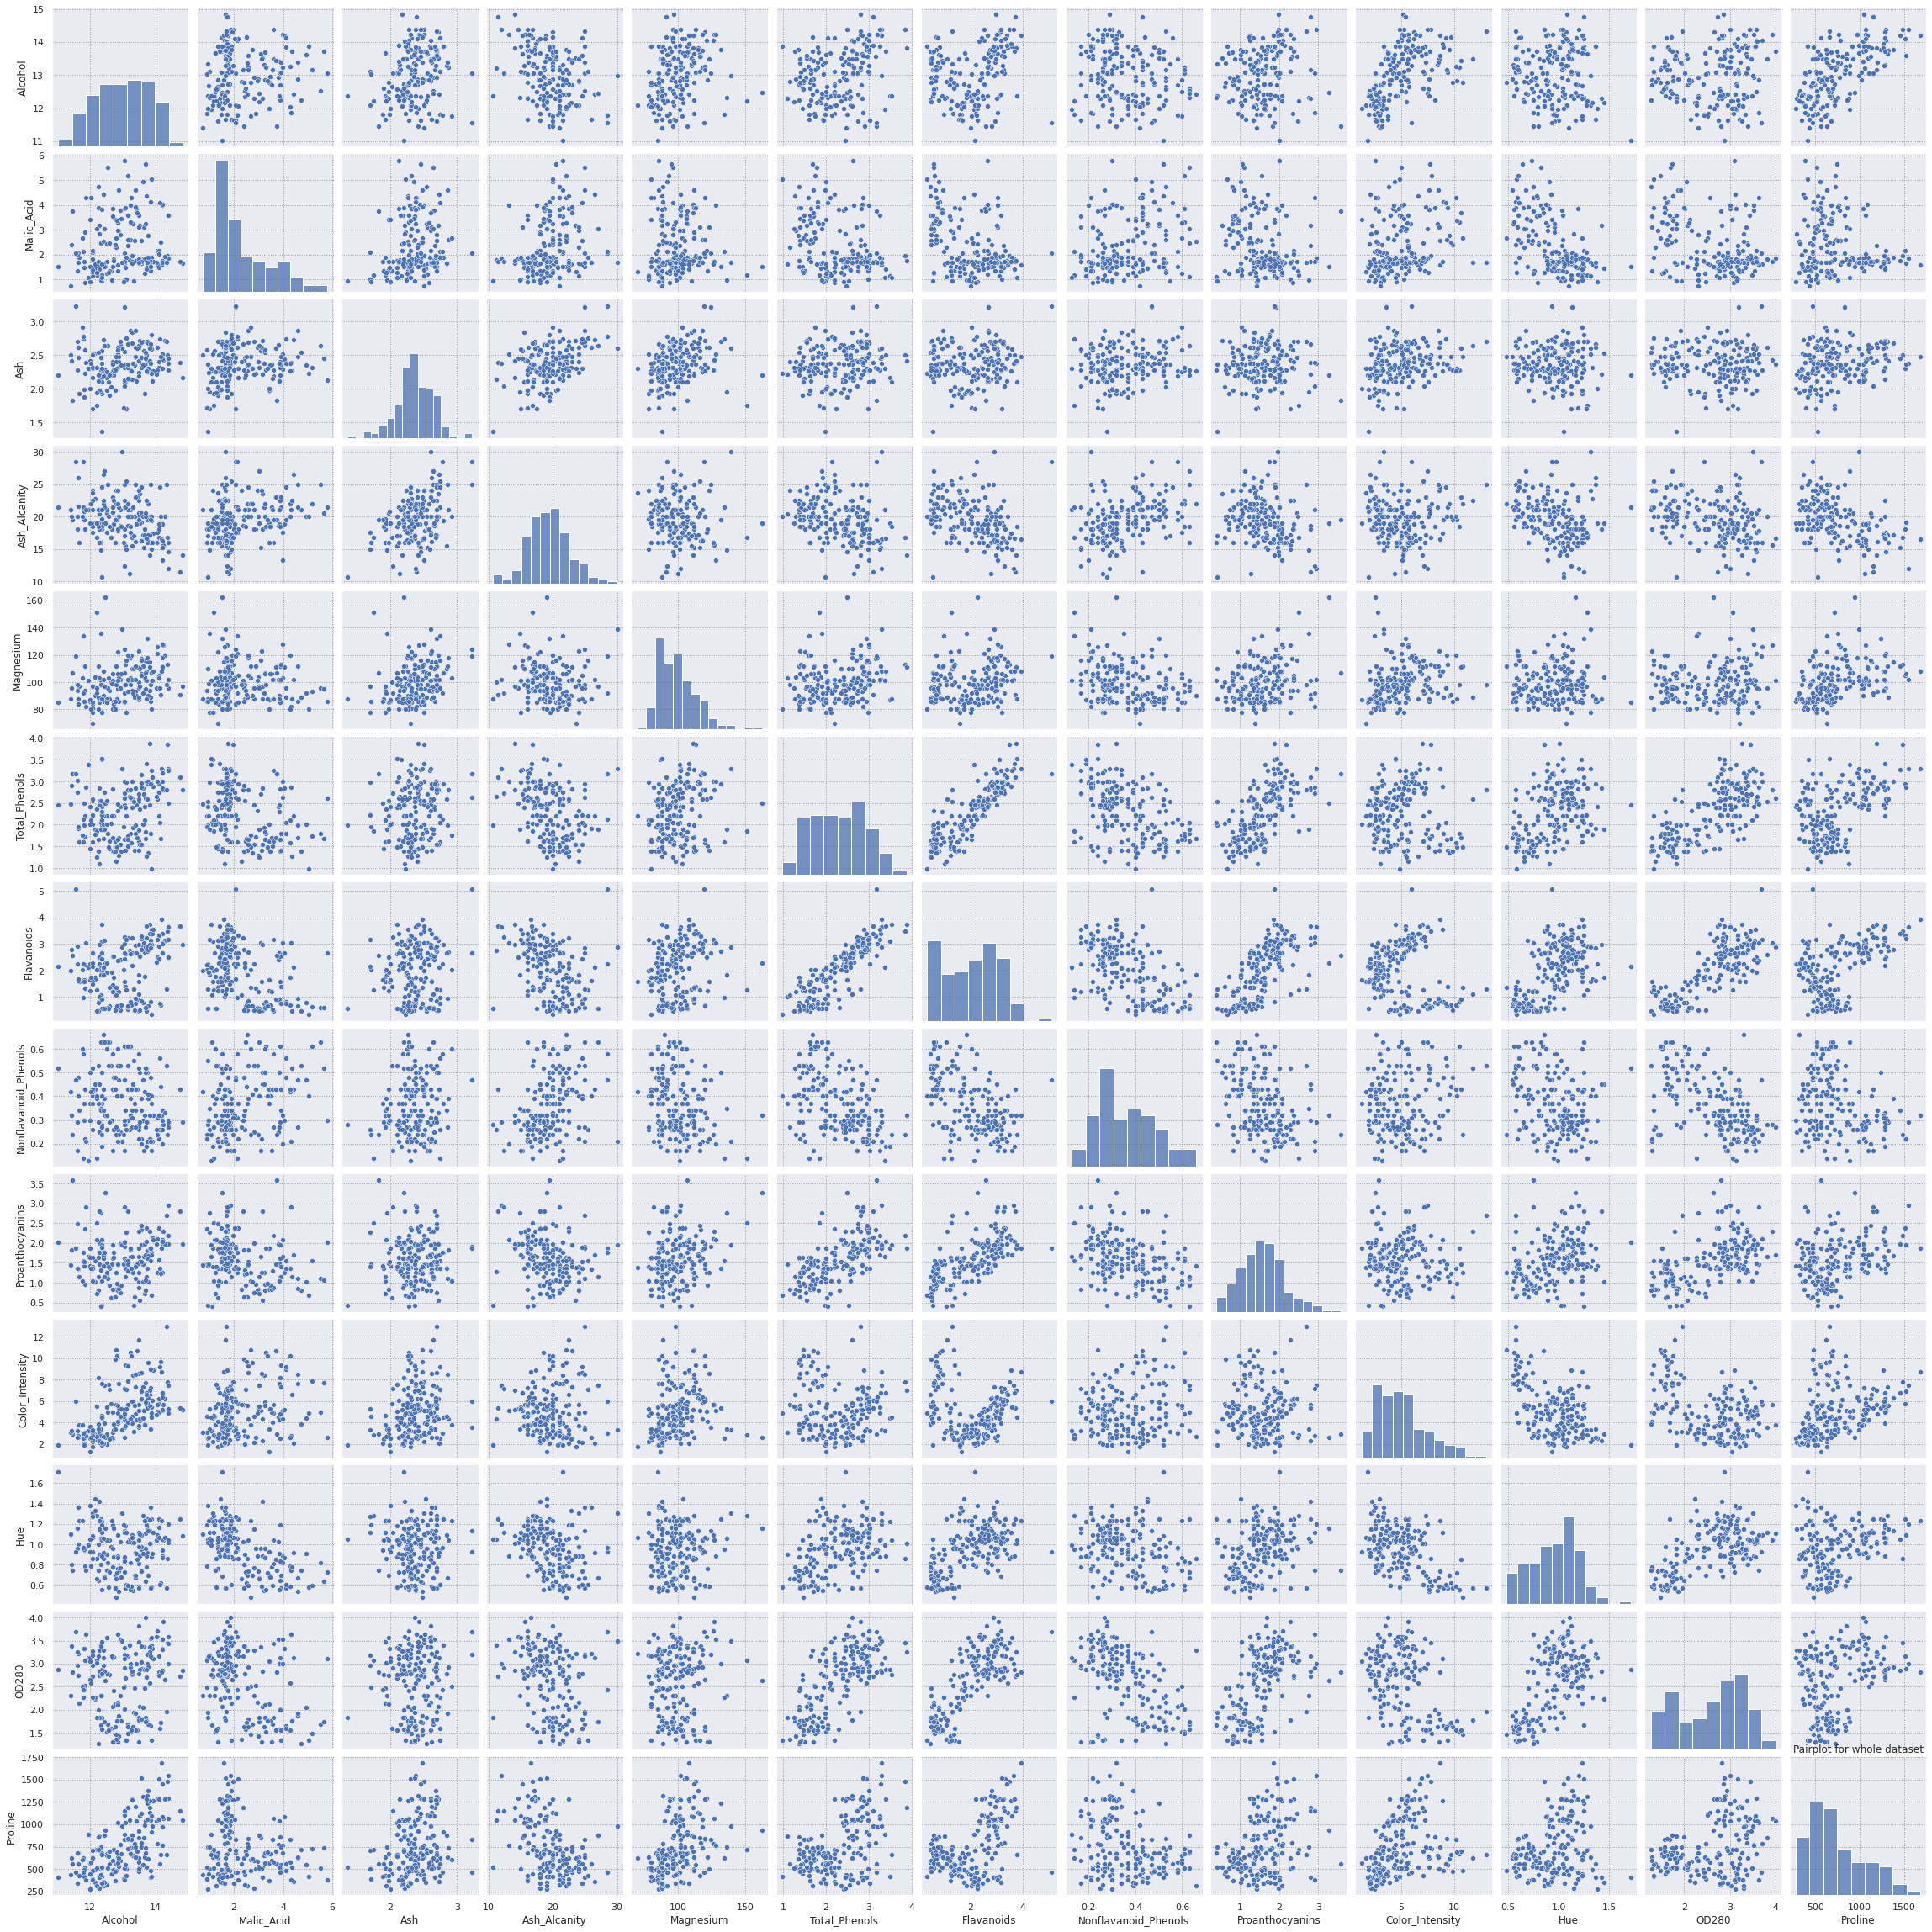

In [ ]:
# let's look at pairplot to spot graphical objects
_ = sns.pairplot(df)
_ = plt.title('Pairplot for whole dataset')
plt.show()

From the graphs above we could say that mostly feature-pairs form spherical objects that is a good sign for K-Means, because otherwise we should consider using different algorithm.

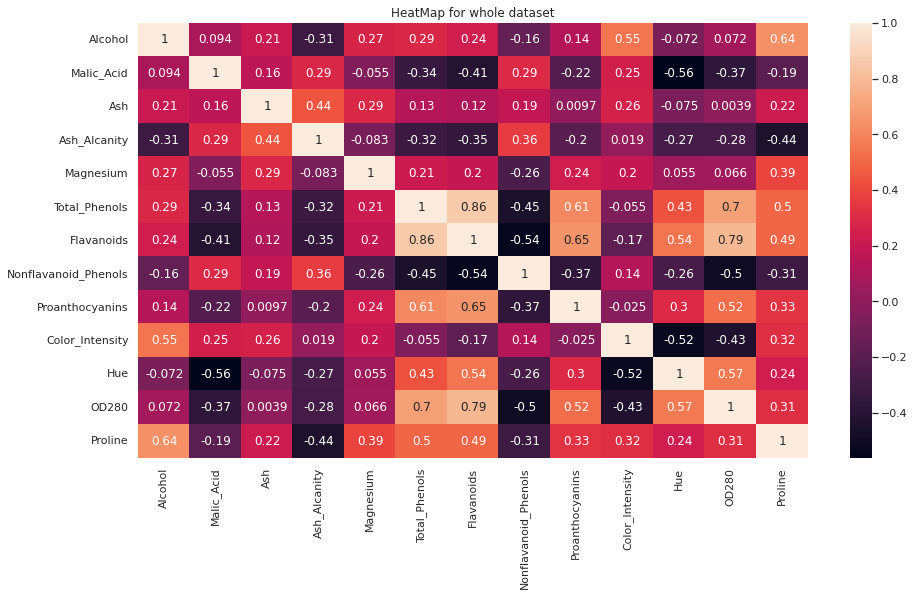

In [ ]:
# let's see for correlation of our features to each other
sns.set(rc={'figure.figsize':(15,8)})
_ = sns.heatmap(df.corr(), annot=True)
_ = plt.title('HeatMap for whole dataset')
plt.show()

From the graph above we can see that some features are highly correlated. How badly will it affect our model? It's a good question. We do know that when variables used in clustering are collinear, then some variables get a higher weight than others. We need to understand that two highly correlated variables represent the same concept, thereby it becomes difficult to accurately partial out their individual impact on the dependent variable. Also, it badly will affect the results of beta coefficients that will not be very reasonable. The main question is, should we deal with them now or leave it like it is? At this moment, we will stick with option 2, by leaving everything the same, and will keep in our minds that for better results we could adjust our actions by revisiting this step.

## **Modeling: K-Means**

In [ ]:
# scalling our data for better results due to high variance of our features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

Alcohol  Malic_Acid       Ash  ...       Hue     OD280   Proline
0  1.518613   -0.562250  0.232053  ...  0.362177  1.847920  1.013009
1  0.246290   -0.499413 -0.827996  ...  0.406051  1.113449  0.965242
2  0.196879    0.021231  1.109334  ...  0.318304  0.788587  1.395148
3  1.691550   -0.346811  0.487926  ... -0.427544  1.184071  2.334574
4  0.295700    0.227694  1.840403  ...  0.362177  0.449601 -0.037874

[5 rows x 13 columns]

In [ ]:
# modeling
num_of_clusters = list(range(1, 25))
inetia_result = []

for i in num_of_clusters:
  model_1 = KMeans(n_clusters=i, verbose=1, random_state=42)
  model_1.fit(df_scaled)

  # appending the sum of squared distances of samples to their closest cluster 
  # center, weighted by the sample weights if provided.
  inetia_result.append(model_1.inertia_)

inetia_result

Initialization complete
Iteration 0, inertia 3212.685959891448.
Iteration 1, inertia 2314.0.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4173.998217849048.
Iteration 1, inertia 2314.0.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 7388.679864221245.
Iteration 1, inertia 2314.0.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3511.7880659759485.
Iteration 1, inertia 2314.0.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5073.241708944934.
Iteration 1, inertia 2314.0.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4785.276052103617.
Iteration 1, inertia 2314.0.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3212.685959891448.
Iteration 1, inertia 2314.0.
Converged at iteration 1: strict convergence.
Initialization complete
It

[2314.0,
 1659.0079672511501,
 1277.9284888446423,
 1175.705192819712,
 1104.8616839625315,
 1042.3872037251422,
 988.0533283180055,
 940.7081650896528,
 902.0783170433883,
 866.7991687164842,
 816.9778775673811,
 802.8796543612842,
 774.0552605734551,
 743.0009216093142,
 719.8778864056562,
 699.0658373802537,
 672.8550974711952,
 666.2655476172198,
 657.8188034592262,
 623.9496613198595,
 614.1234012454672,
 600.9544643840462,
 582.83467516195,
 574.2670147168561]

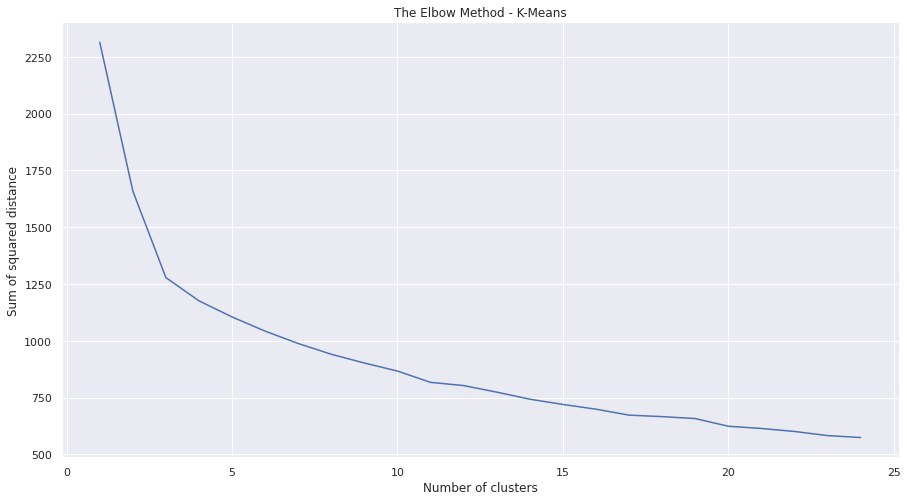

In [ ]:
# let's graph our results
sns.set(rc={'figure.figsize':(15,8)})
_ = plt.plot(num_of_clusters, inetia_result)
_ = plt.title("The Elbow Method - K-Means")
_ = plt.xlabel("Number of clusters")
_ = plt.ylabel("Sum of squared distance")
plt.show()

From the graph above we could clearly see that K-Means were able to identify 3 groups/clusters. If the line would be too smooth with no angle then we could use a second option of identifying clusters via 'silhouette score'. Just keep in our minds.

In [ ]:
# modeling with 3 clusters
model_1_final = KMeans(n_clusters=3, random_state=42)
model_1_pred = model_1_final.fit_predict(df_scaled)
model_1_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [ ]:
# adding our K-Means results to the original dataset for futher visualization
df['K-Means-Prediction'] = model_1_pred
df.head()

Alcohol  Malic_Acid   Ash  ...  OD280  Proline  K-Means-Prediction
0    14.23        1.71  2.43  ...   3.92     1065                   1
1    13.20        1.78  2.14  ...   3.40     1050                   1
2    13.16        2.36  2.67  ...   3.17     1185                   1
3    14.37        1.95  2.50  ...   3.45     1480                   1
4    13.24        2.59  2.87  ...   2.93      735                   1

[5 rows x 14 columns]

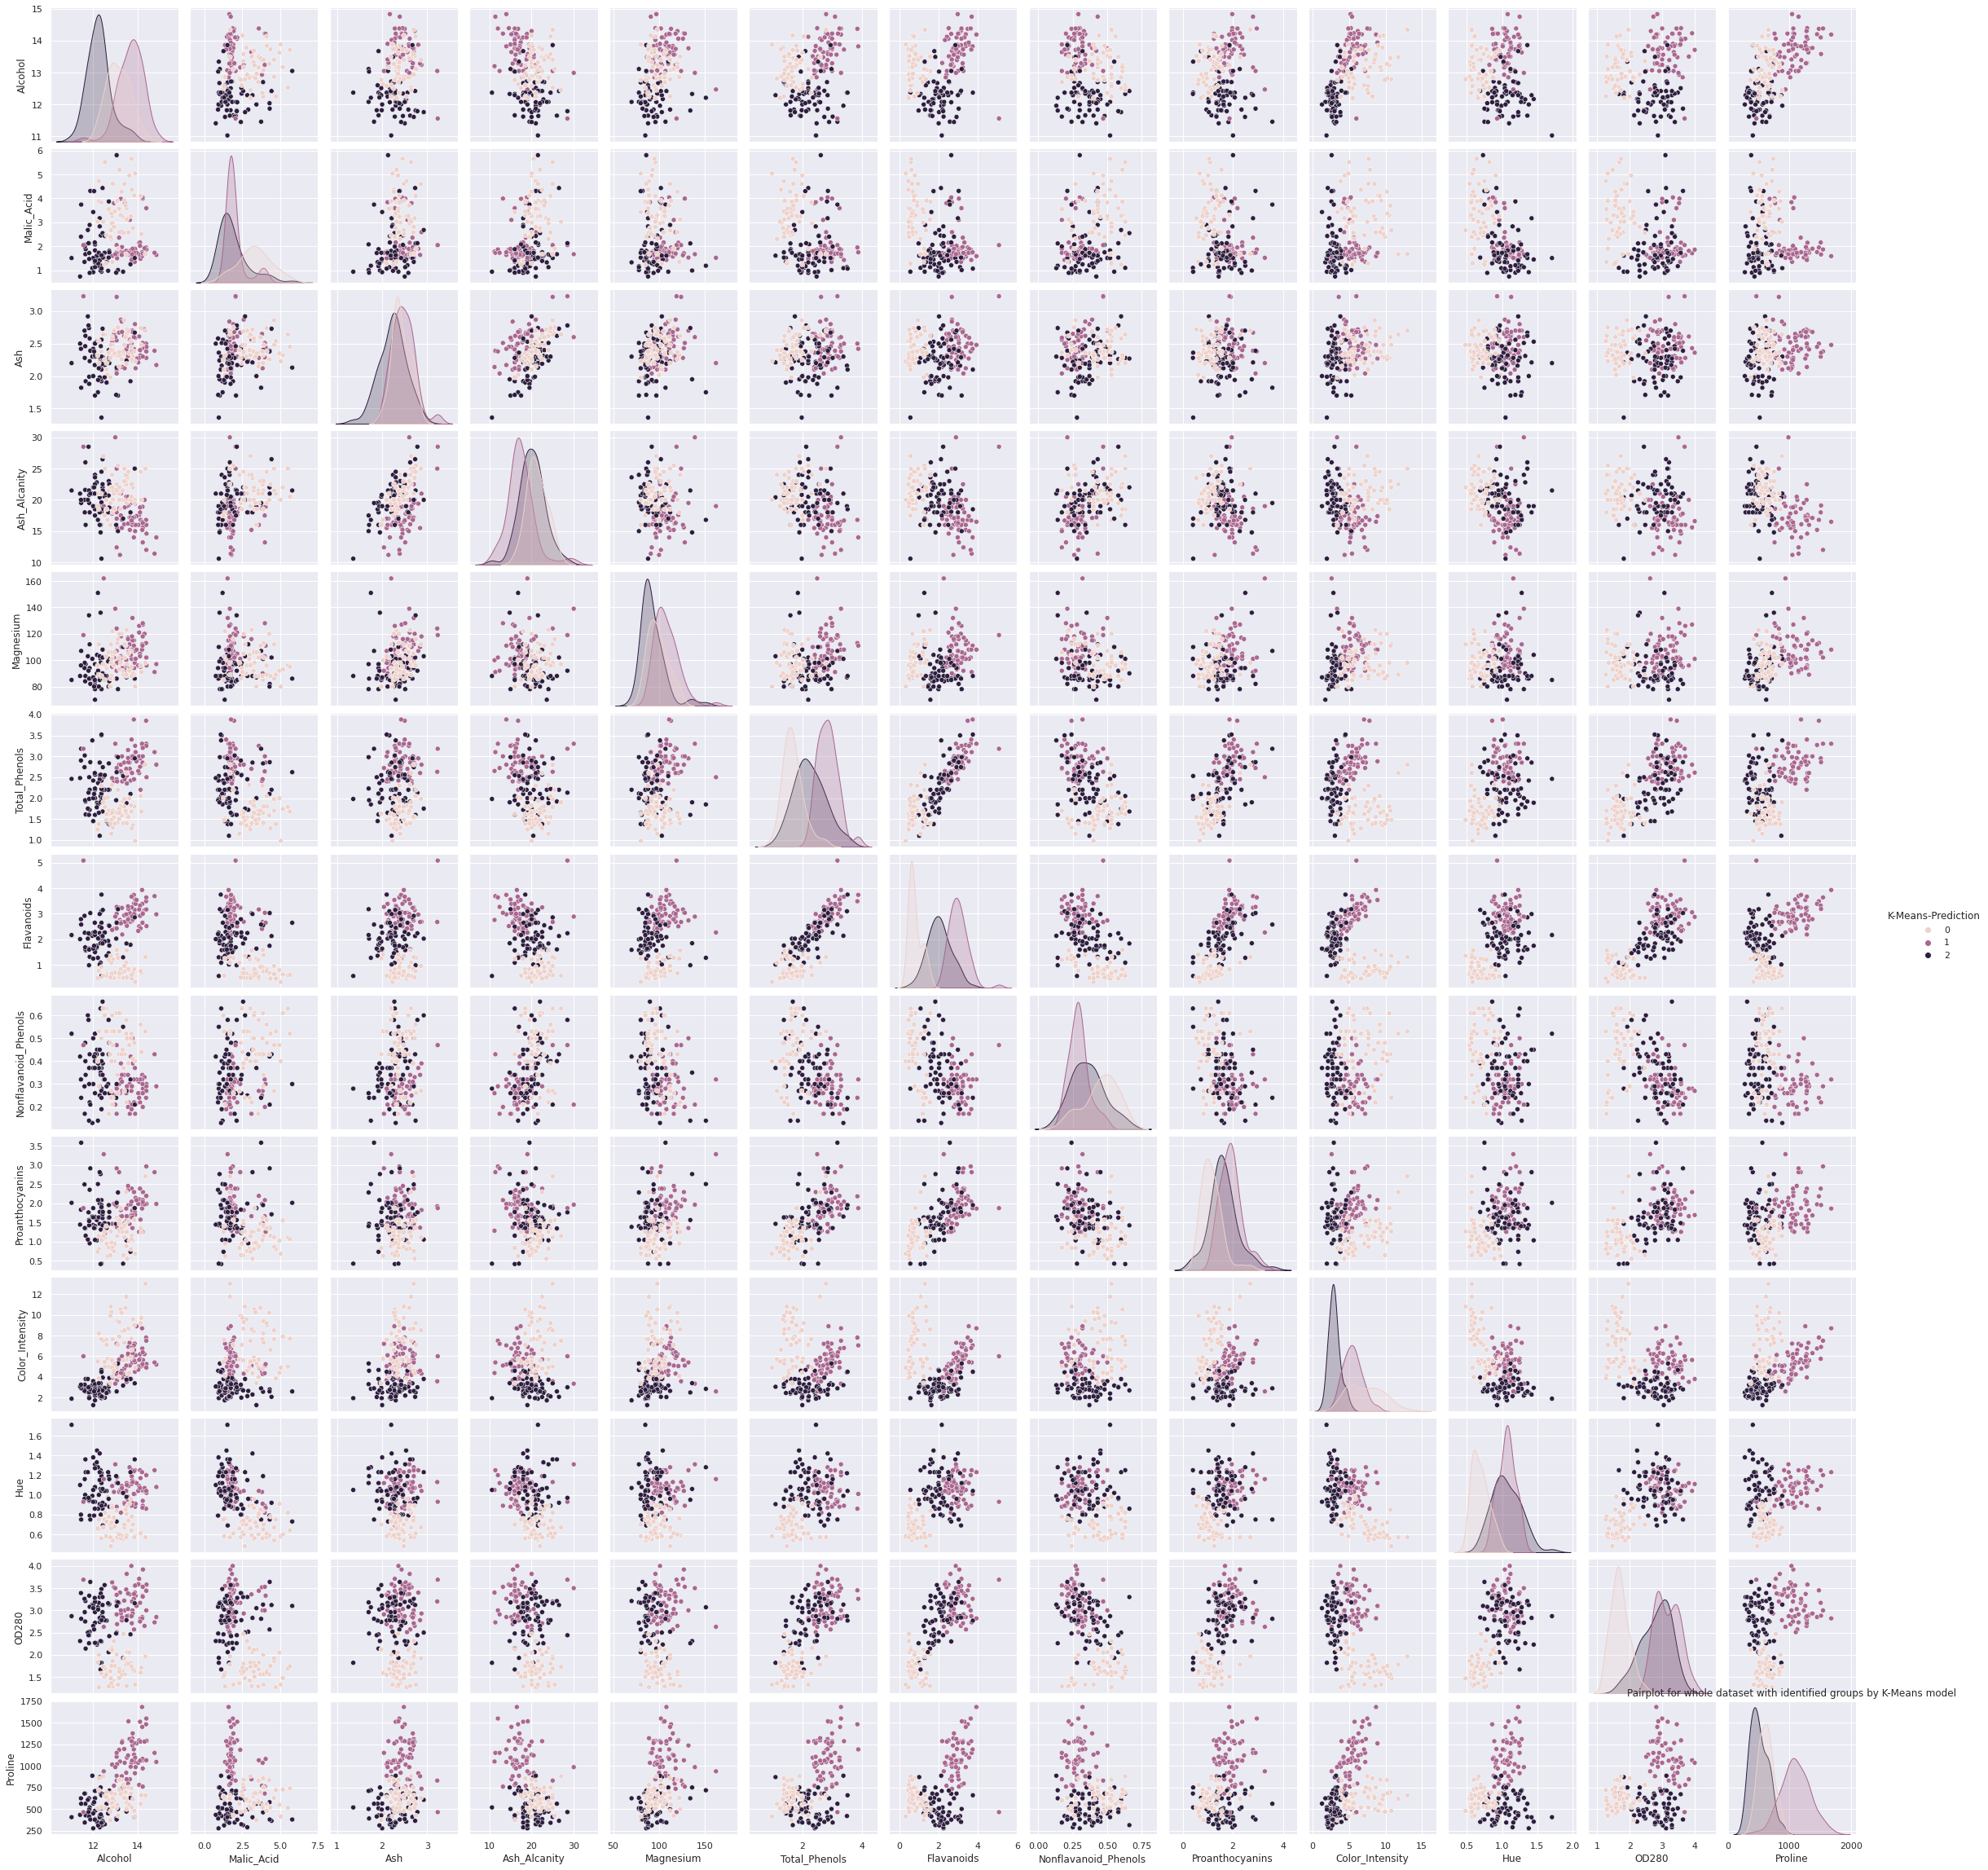

In [ ]:
_ = sns.pairplot(df, hue='K-Means-Prediction')
_ = plt.title('Pairplot for whole dataset with identified groups by K-Means\
 model')
plt.show()

Based on the above graph we could say that the K-Means model was able to make a decent work by clustering our dataset, but it feels like some features are overlapping. It could be due to outliers or a high correlation of some features. Anyway, as we mentioned above there is always will be room for improvement.

## **Modeling: K-Medoids**

In [ ]:
# https://scikit-learn-extra.readthedocs.io/en/stable/generated/sklearn_extra.cluster.KMedoids.html
# here we will not be using scaled data because this model does not require to
# have it because it's based on median values
# modeling
num_of_clusters = list(range(1, 25))
inetia_result = []

for i in num_of_clusters:
  model_2 = KMedoids(n_clusters=i, random_state=42)
  model_2.fit(df.drop(columns=['K-Means-Prediction']))

  # appending the sum of squared distances of samples to their closest cluster 
  # center, weighted by the sample weights if provided.
  inetia_result.append(model_2.inertia_)

inetia_result

[44644.202335042224,
 23407.380695660446,
 16376.969320536655,
 14106.069431045496,
 11452.920268572318,
 10579.58332324687,
 7572.278448188206,
 7043.99465445733,
 6547.220663515422,
 6253.725340994561,
 6155.936939346333,
 6082.584171488137,
 9354.308758691863,
 9283.857408015383,
 9252.528447416,
 9295.008649812396,
 9314.79974763803,
 9305.534820760682,
 9240.52655029354,
 9172.536553350512,
 9207.172548045675,
 9187.775605716773,
 9152.434148847053,
 9103.4374529191]

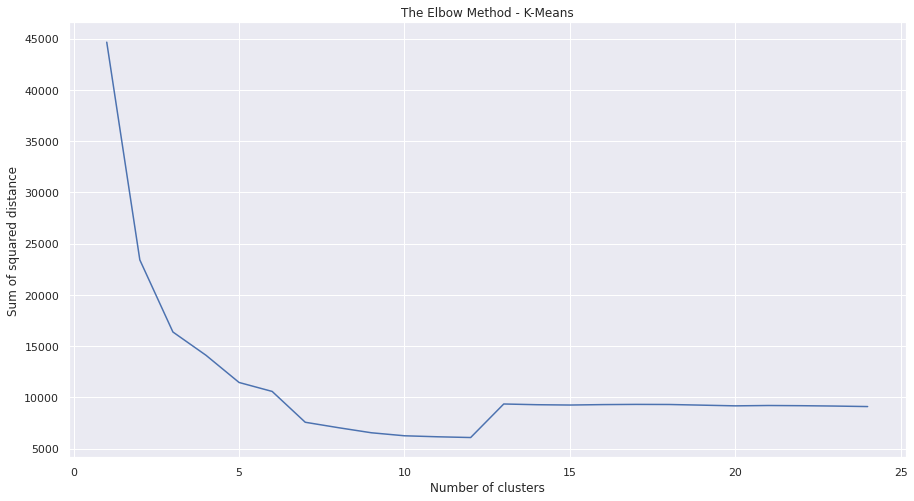

In [ ]:
# let's graph our results
sns.set(rc={'figure.figsize':(15,8)})
_ = plt.plot(num_of_clusters, inetia_result)
_ = plt.title("The Elbow Method - K-Means")
_ = plt.xlabel("Number of clusters")
_ = plt.ylabel("Sum of squared distance")
plt.show()

Interestingly, based on the above graph we could say that K-Medoids actually chose 5 or even 7 clusters compared to K-Means that had 3. But here, we will stick to 5 for demonstration purposes.


In [ ]:
# modeling with 5 clusters
model_2_final = KMedoids(n_clusters=5, random_state=42)
model_2_pred = model_2_final.fit_predict(df.drop(columns=['K-Means-Prediction']))

# adding our K-Means results to the original dataset for futher visualization
df['K-Medoids-Prediction'] = model_2_pred
df.head()

Alcohol  Malic_Acid   Ash  ...  Proline  K-Means-Prediction  K-Medoids-Prediction
0    14.23        1.71  2.43  ...     1065                   1                     1
1    13.20        1.78  2.14  ...     1050                   1                     1
2    13.16        2.36  2.67  ...     1185                   1                     1
3    14.37        1.95  2.50  ...     1480                   1                     1
4    13.24        2.59  2.87  ...      735                   1                     2

[5 rows x 15 columns]

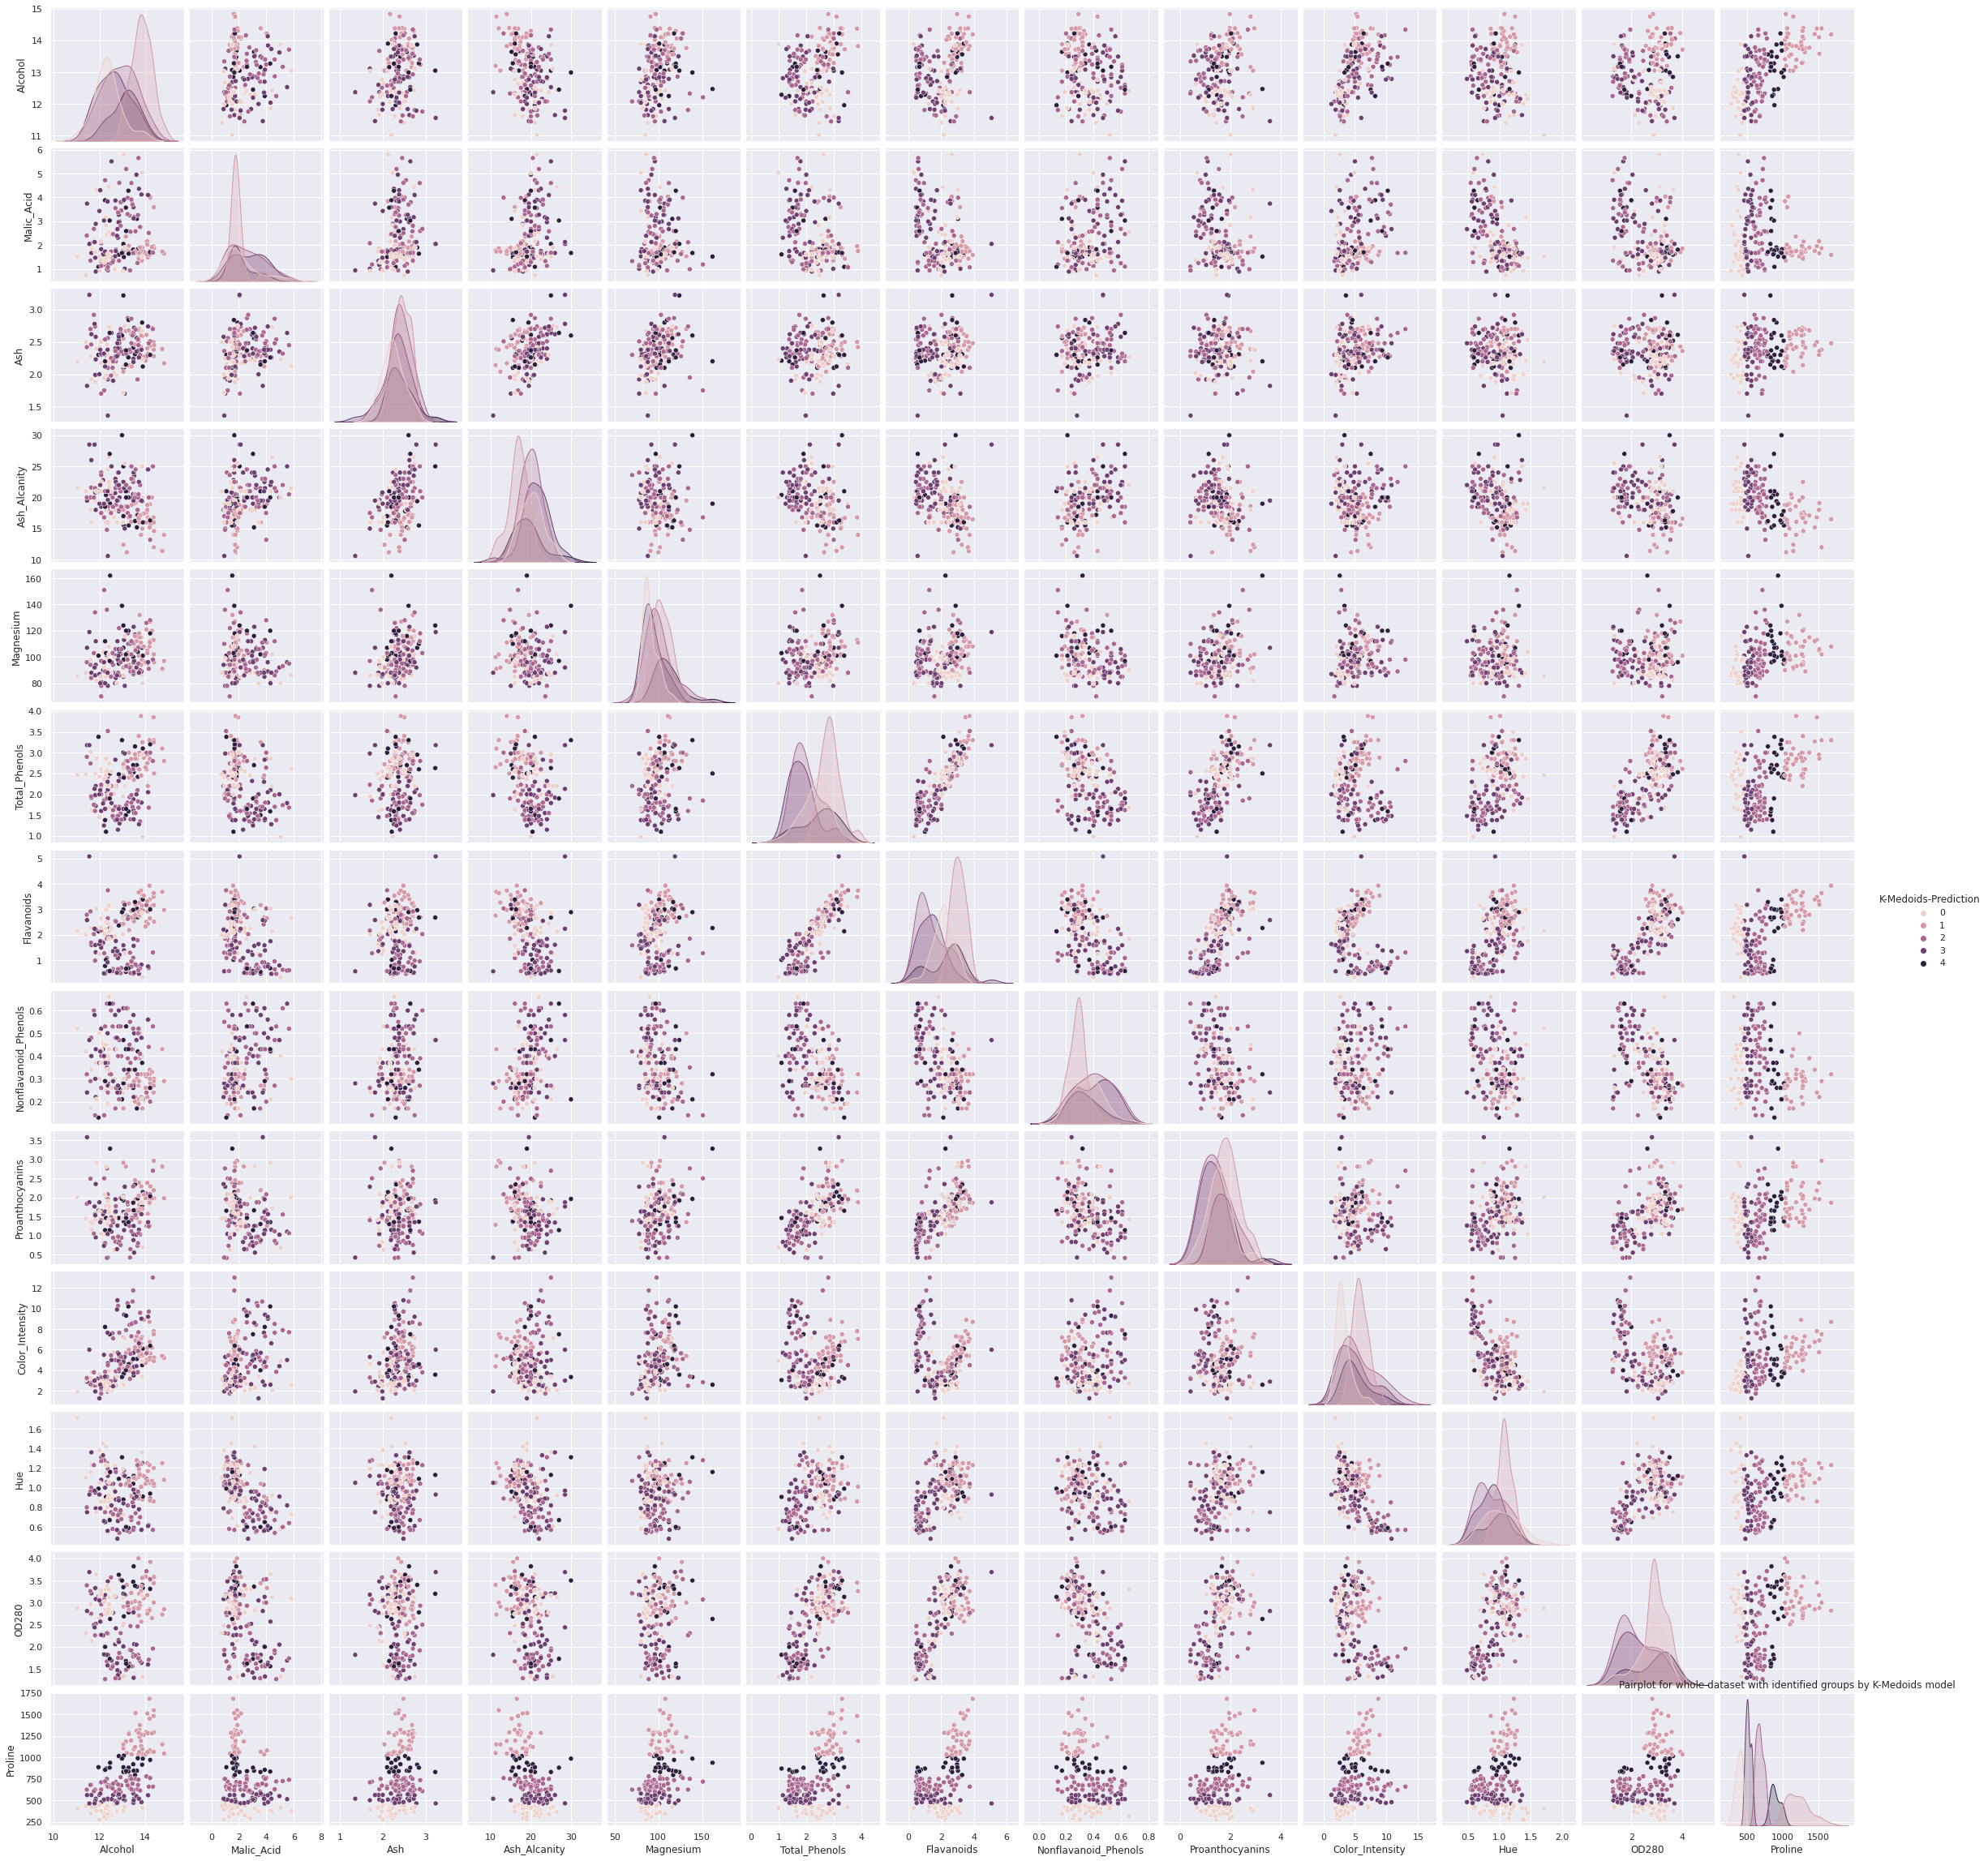

In [ ]:
_ = sns.pairplot(df.drop(columns=['K-Means-Prediction']),
                 hue='K-Medoids-Prediction')
_ = plt.title('Pairplot for whole dataset with identified groups by K-Medoids\
 model')
plt.show()

Comparing results from two clustering models we could say that K-Means has done a better job here despite the existence of outliers and collinearity. But still, it's a good practice to compare your outcomes with different models, so you can decide which one works for you better according to selected factors.